In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('Bank Dataset.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4982 non-null   int64  
 1   Age                 4982 non-null   int64  
 2   Experience          4982 non-null   int64  
 3   Income              4982 non-null   int64  
 4   ZIP_Code            4982 non-null   int64  
 5   Family_members      4982 non-null   int64  
 6   CCAvg               4982 non-null   float64
 7   Education           4982 non-null   int64  
 8   Mortgage            4982 non-null   int64  
 9   Personal_Loan       4982 non-null   int64  
 10  Securities_Account  4982 non-null   int64  
 11  CD_Account          4982 non-null   int64  
 12  Online              4982 non-null   int64  
 13  CreditCard          4982 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 545.0 KB


In [6]:
df = df.drop(['ID','ZIP_Code'],axis=1)

In [7]:
df.head()

,Age,Experience,Income,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [8]:
X = df.drop('Personal_Loan',axis=1)
y = df['Personal_Loan']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)

In [16]:
X_test = sc.transform(X_test)

In [17]:
clf = MLPClassifier(hidden_layer_sizes=100, solver='sgd',max_iter=5000,random_state=21,verbose=True,tol=0.01)

In [18]:
clf.fit(X_train,y_train)

Iteration 1, loss = 0.64337742
Iteration 2, loss = 0.57200145
Iteration 3, loss = 0.50925782
Iteration 4, loss = 0.46310156
Iteration 5, loss = 0.42893914
Iteration 6, loss = 0.40240410
Iteration 7, loss = 0.38109913
Iteration 8, loss = 0.36349894
Iteration 9, loss = 0.34854138
Iteration 10, loss = 0.33552069
Iteration 11, loss = 0.32394017
Iteration 12, loss = 0.31366579
Iteration 13, loss = 0.30439043
Iteration 14, loss = 0.29594532
Iteration 15, loss = 0.28805189
Iteration 16, loss = 0.28083580
Iteration 17, loss = 0.27416434
Iteration 18, loss = 0.26794322
Iteration 19, loss = 0.26211477
Iteration 20, loss = 0.25668754
Iteration 21, loss = 0.25157118
Iteration 22, loss = 0.24682533
Iteration 23, loss = 0.24234252
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [19]:
pred_train = clf.predict(X_train)

In [20]:
pred_test = clf.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve

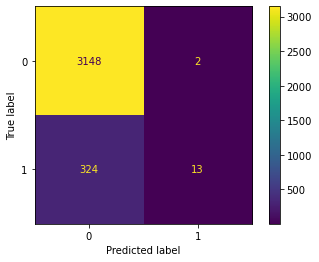

In [25]:
plot_confusion_matrix(estimator=clf,X=X_train,y_true=y_train)

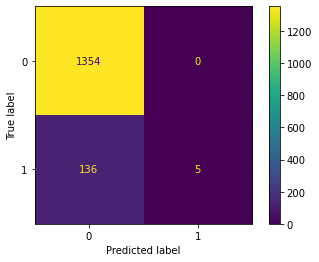

In [26]:
plot_confusion_matrix(estimator=clf,X=X_test,y_true=y_test)

In [28]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3150
           1       0.87      0.04      0.07       337

    accuracy                           0.91      3487
   macro avg       0.89      0.52      0.51      3487
weighted avg       0.90      0.91      0.87      3487



In [29]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1354
           1       1.00      0.04      0.07       141

    accuracy                           0.91      1495
   macro avg       0.95      0.52      0.51      1495
weighted avg       0.92      0.91      0.87      1495



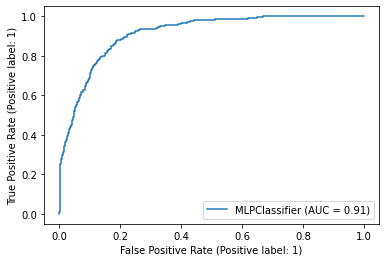

In [31]:
plot_roc_curve(estimator=clf,X=X_train,y=y_train)

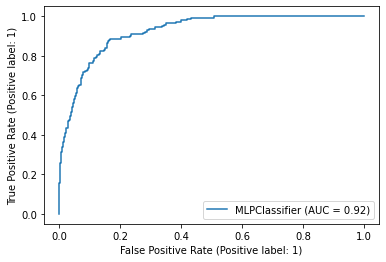

In [32]:
plot_roc_curve(estimator=clf,X=X_test,y=y_test)